In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from IPython.display import clear_output

In [4]:
xd = np.loadtxt('/Users/esedicol/Desktop/Desktop/Basketball-Shot-Detectection/COORDINATES/person_x_coord.txt', dtype=int)
yd = np.loadtxt('/Users/esedicol/Desktop/Desktop/Basketball-Shot-Detectection/COORDINATES/person_y_coord.txt', dtype=int)

# 2D court points

#### corner points:
- bottom left, top left, bottom right, top right
- (0, 400), (0, 0), (500, 400), (500, 0)

#### free throw points
- bottom left, top left, bottom right, top right
- (190, 400), (190, 240), (310, 400), (310, 240)

#### three point arc
- bottom left, center, bottom right
- (50, 400), (250, 190), (450, 400)

In [5]:
corner = [(0, 400), (0, 0), (500, 400), (500, 0)]
freeThrow = [(190, 400), (190, 240), (310, 400), (310, 240)]
threeArc = [(50, 400), (250, 185), (450, 400)]

full_court = corner + freeThrow + threeArc

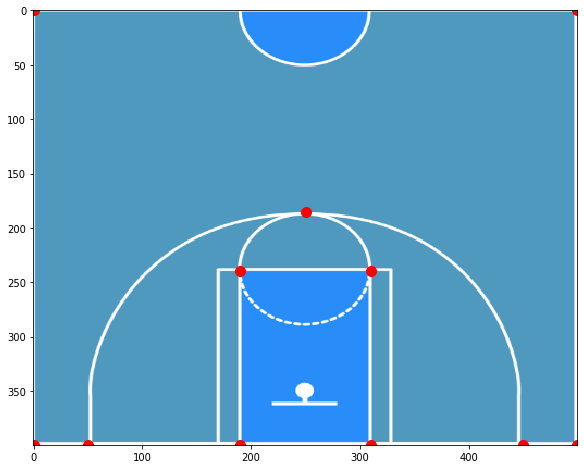

In [8]:
plt.figure(figsize=(10,8))

court = cv2.imread('/Users/esedicol/Desktop/Desktop/Basketball-Shot-Detectection/images/court.png')
court  = cv2.resize(court, (500,400))

for i in range(0,len(full_court)):
    plt.scatter(full_court[i][0], full_court[i][1], s=100, marker="o", c='r')
    
plt.imshow(court)
plt.show()

In [ ]:
# vs = cv2.VideoCapture('VIDEOS/PLAYER_EXTRACTION_TEST.mov') 

# while True:
#     # grab the current frame
#     _, img = vs.read()
#     img = cv2.resize(img,(600, 400))
#     roi = img[150:400, 0: 600]

#     r_h, r_w, r_c = roi.shape
#     i_h, i_w, i_c = img.shape

#     # line detection works better with grayscale images (less pixel range to process)
#     gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

#     # Canny edge detection to detect line edges
#     edges = cv2.Canny(gray, 50, 150, apertureSize=3)
#     lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

#     for line in lines:
#         rho, theta = line[0]
#         a = np.cos(theta)
#         b = np.sin(theta)

#         x0 = a * rho
#         y0 = b * rho

#         x1 = int(x0 + 1000 * (-b))
#         y1 = int(y0 + 1000 * (a))
#         x2 = int(x0 - 1000 * (-b))
#         y2 = int(y0 - 1000 * (a))

#         x = cv2.line(img, (x1, y1 + (i_h - r_h)), (x2, y2 + (i_h - r_h)), (0, 0 ,255), 1)

#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()
#     clear_output(wait=True)

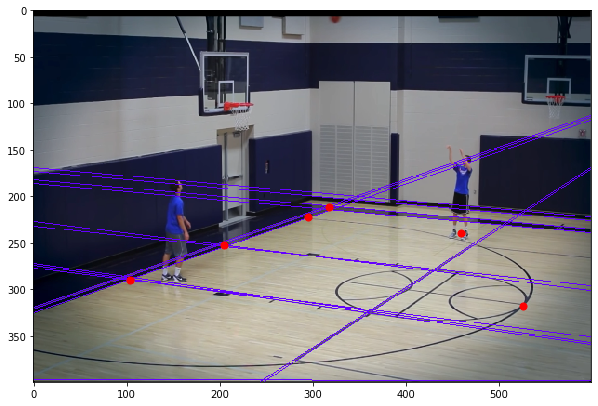

In [14]:
plt.figure(figsize=(10,8))

img = cv2.imread('/Users/esedicol/Desktop/Desktop/Basketball-Shot-Detectection/images/court_extraction.png')
img  = cv2.resize(img, (600,400))

roi = img[150:400, 0: 600]

r_h, r_w, r_c = roi.shape
i_h, i_w, i_c = img.shape

# line detection works better with grayscale images (less pixel range to process)
gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

# Canny edge detection to detect line edges
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(img, (x1, y1 + (i_h - r_h)), (x2, y2 + (i_h - r_h)), (255, 0 ,100), 1)
    
xy_points = [(104, 290),(205, 252),(526, 318),(295, 222),(318, 212), (460, 240)]

for t in range(0, len(xy_points)):
    plt.scatter(xy_points[t][0], xy_points[t][1], s=50, c='r', marker='o')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
points_3D = np.float32([(104, 290), (205, 252), (526, 318), (295, 222), (318, 212)])
points_2D = np.float32([(310, 400), (190, 400), (250, 185), (50, 400), (0, 400)])

In [20]:
matrix, status = cv2.findHomography(points_3D, points_2D)

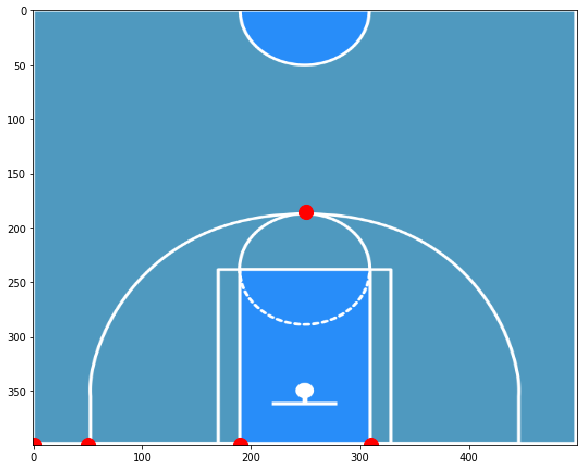

(400, 500, 3)

In [21]:
plt.figure(figsize=(10, 8))

for p in range(0, len(points_2D)):
    plt.scatter(points_2D[p][0], points_2D[p][1], s=200, c='r')
    
plt.imshow(court)
plt.show()

court.shape

In [31]:
out = cv2.warpPerspective(img, matrix, (court.shape[1], court.shape[0]))
out.shape

(400, 500, 3)

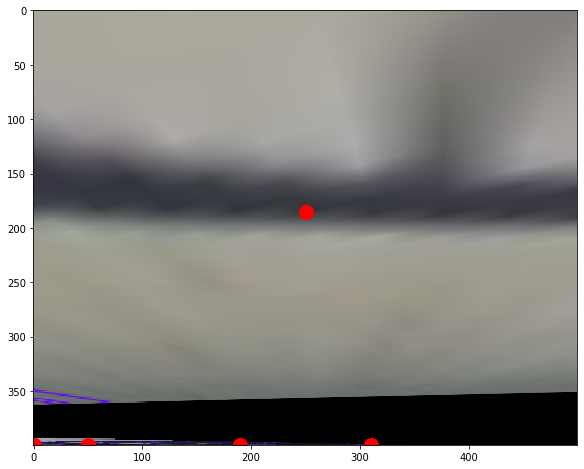

In [33]:
plt.figure(figsize=(10, 8))
for p in range(0, len(points_2D)):
    plt.scatter(points_2D[p][0], points_2D[p][1], s=200, c='r')
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
# plt.axis('off')
plt.show()

In [ ]:
points_2D